## code
- [grad dir](https://github.com/chunhuizhang/bilibili_vlogs/tree/master/learn_torch/grad)
- [basic](https://github.com/chunhuizhang/bilibili_vlogs/blob/master/learn_torch/grad/03_computation_graph.ipynb)
- [forward & backward](https://github.com/chunhuizhang/bilibili_vlogs/blob/master/learn_torch/grad/04_backward_step.ipynb)

## process
### pytorch basis
- [✅] grad
- [✅] partial derivaties
- [✅] compute graph
- [✅] forward & backward
- [✅] torch_variables_grad_inplace_operation
- [✅] retain_graph

## Acknowledgments
- [chunhuizhang](https://github.com/chunhuizhang)

In [1]:
import torch
import torch.nn as nn
import numpy as np
from IPython.display import Image

In [2]:
x = torch.tensor(3., requires_grad=True)

In [3]:
print(x.data)
print(x.grad)
print(x.is_leaf)
print(x.requires_grad)

tensor(3.)
None
True
True


In [4]:
y = 6*x**2 + 2*x + 4

In [5]:
print(y.data)
print(y.grad)
print(y.is_leaf)
print(y.requires_grad)

tensor(64.)
None
False
True


/var/folders/ct/4yt884f52n51f9185yc75hlw0000gp/T/ipykernel_96768/161933282.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  print(y.grad)


UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1716905753432/work/build/aten/src/ATen/core/TensorBody.h:494.)
  print(y.grad)

这个警告信息是 PyTorch 关于梯度计算的提示，解释如下：

核心问题：你正在尝试访问一个非叶子张量(non-leaf Tensor)的 .grad 属性，但默认情况下 PyTorch 不会为非叶子张量保存梯度值。

关键概念：

叶子张量(leaf Tensor)：直接由用户创建的张量（如 torch.tensor() 或 nn.Parameter）

非叶子张量(non-leaf Tensor)：通过运算从叶子张量计算得到的张量

解决方案：

如果你确实需要非叶子张量的梯度，可以在计算后立即调用 .retain_grad()

如果这是误操作，你应该访问原始叶子张量的梯度

In [6]:
y.backward()

x.grad = 12 * x + 2 

In [7]:
print(x.data)
print(x.grad)
print(x.is_leaf)
print(x.requires_grad)

tensor(3.)
tensor(38.)
True
True


In [8]:
print(y.data)
print(y.grad)
print(y.is_leaf)
print(y.requires_grad)

tensor(64.)
None
False
True


/var/folders/ct/4yt884f52n51f9185yc75hlw0000gp/T/ipykernel_96768/161933282.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  print(y.grad)


In [9]:
u = torch.tensor(3., requires_grad=True)
v = torch.tensor(4., requires_grad=True)

In [10]:
f = u**3 + v**2 + 4*u*v

In [11]:
f.backward()

- `u.grad` = 3*u**2 + 4*v = 27 + 16 = 43

In [12]:
u.grad


tensor(43.)

- `v.grad` = 2 * v + 4*u =  = 8 + 12 = 

In [13]:
v.grad

tensor(20.)

In [14]:
import torch
a = torch.randn((3,3),requires_grad=True)

w1 = torch.randn((3,3),requires_grad=True)
w2 = torch.randn((3,3),requires_grad=True)
w3 = torch.randn((3,3),requires_grad=True)
w4 = torch.randn((3,3),requires_grad=True)

b = w1 * a
c = w2 * a
d = w3 * a + w4 * a

L = 10 - d

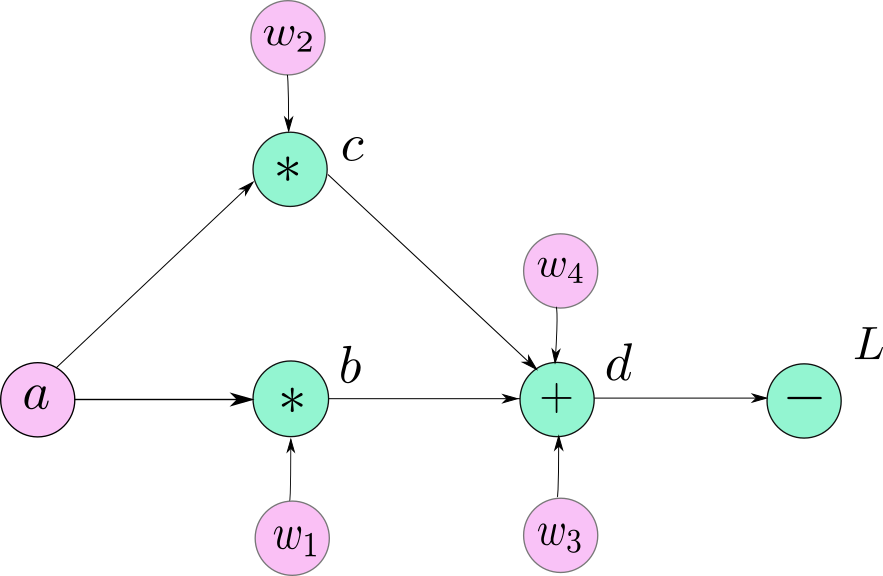

In [15]:
Image('./imgs/comp_graph.png')

In [16]:
a.is_leaf

True

In [17]:
w1.is_leaf

True

In [18]:
w4.is_leaf

True

In [19]:
L

tensor([[11.2087, 14.0358, 10.0861],
        [10.0691,  8.5266,  9.3272],
        [10.7612, 10.8552, 10.0028]], grad_fn=<RsubBackward1>)

In [20]:
#L.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

In [21]:
#%%timeit
import torch

a = torch.randn((3,3),requires_grad=True)

w1 = torch.randn((3,3),requires_grad=True)
w2 = torch.randn((3,3),requires_grad=True)
w3 = torch.randn((3,3),requires_grad=True)
w4 = torch.randn((3,3),requires_grad=True)

b = w1 * a
c = w2 * a

d = w3 * b + w4 * c
d.retain_grad()
L = (10-d).sum()


In [22]:
%timeit
L

tensor(84.8714, grad_fn=<SumBackward0>)

In [23]:
L.backward()

In [24]:
a.grad

tensor([[-0.0109,  0.4836, -1.2134],
        [ 0.1007, -0.3043, -1.5078],
        [-0.8068,  0.8413,  1.8103]])

In [25]:
-w3*w1-w4*w2

tensor([[-0.0109,  0.4836, -1.2134],
        [ 0.1007, -0.3043, -1.5078],
        [-0.8068,  0.8413,  1.8103]], grad_fn=<SubBackward0>)

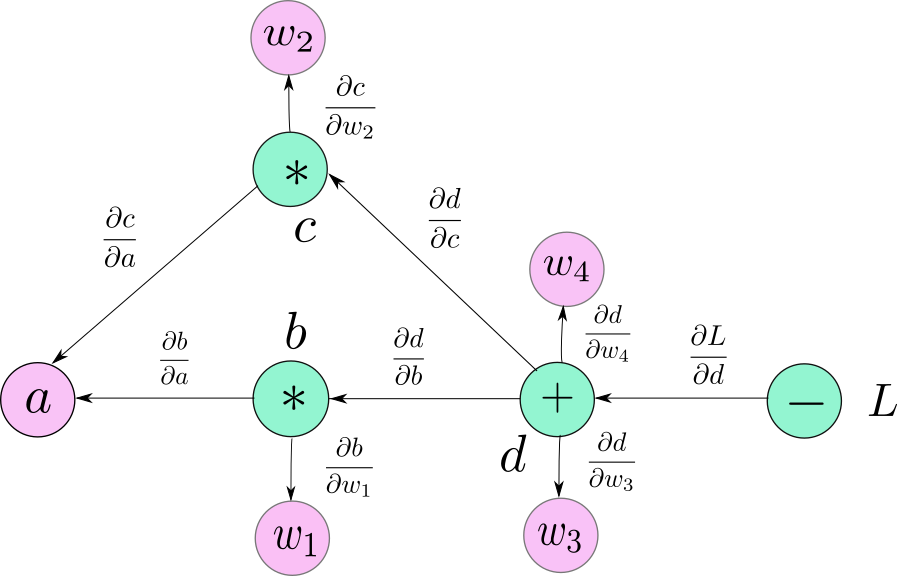

In [26]:
Image('./imgs/comp_graph_grad.PNG')

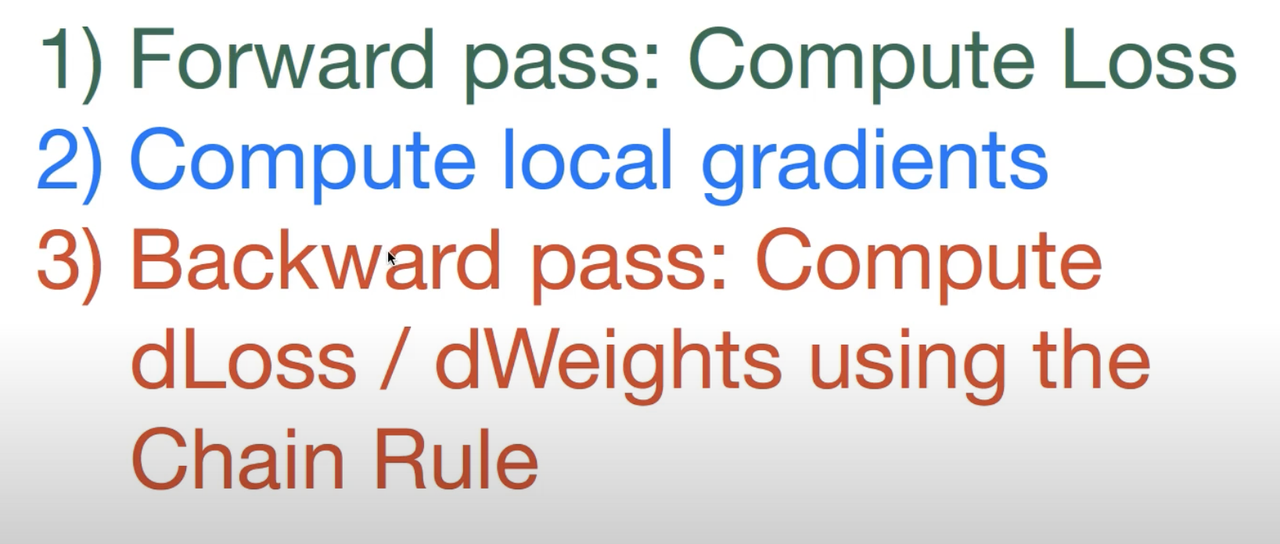

In [27]:
Image('./imgs/forward_backward.PNG', width=600, height=450)

In [28]:
x = torch.tensor([1.,2.],requires_grad=True)
y = 100*x
loss = y.sum()
optimizer = torch.optim.SGD([x], lr=0.01)
loss.backward()
# w = w - lr* w.grad
# b = b - lr* b.grad
optimizer.step()

In [29]:
x.grad 

tensor([100., 100.])

In [30]:
# (1-0.01*100,2-0.01*100) = (0,1)
x.data

tensor([2.2352e-08, 1.0000e+00])

In [31]:
x

tensor([2.2352e-08, 1.0000e+00], requires_grad=True)

In [32]:
0.01 * x.grad

tensor([1., 1.])

In [33]:
import sys
print(torch.__version__)
print(sys.version_info)

2.3.1
sys.version_info(major=3, minor=12, micro=10, releaselevel='final', serial=0)


- compute loss
    - forward
- loss.backward()（或者任意的 objective.backward()）
    - backward (compute grad)
- optimizer.step()
    - x = x - lr*x.grad

两种不被允许的 inplace operation
1. 对于 requires_grad==True 的 叶子张量 (leaf tensor) 不能使用 inplace operation
    - all Parameters are leaf node and requires grad
    - tensor.is_leaf == True
2. 对于在求梯度阶段需要用到的张量不能使用 inplace operation

In [34]:
w = torch.FloatTensor(10)
w.requires_grad = True

In [35]:
w

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [36]:
w.is_leaf

True

In [37]:
#w.normal_()

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

In [38]:
w.data.requires_grad

False

In [39]:
w.data.requires_grad

False

In [40]:
w.data.normal_()

tensor([ 0.2385,  0.7657,  1.6036, -0.3764,  1.4592,  0.8077, -0.0473, -0.1891,
        -0.5735, -0.7199])

In [41]:
w.data

tensor([ 0.2385,  0.7657,  1.6036, -0.3764,  1.4592,  0.8077, -0.0473, -0.1891,
        -0.5735, -0.7199])

In [42]:
x = torch.FloatTensor([[1., 2.]])
w1 = torch.FloatTensor([[2.], [1.]])
w2 = torch.FloatTensor([3.])
w1.requires_grad = True
w2.requires_grad = True

In [43]:
w2.is_leaf

True

In [44]:
'''
d = torch.matmul(x,w1)
f = torch.matmul(d,w2)
d[:] = 0 
f.backward()
'''

'\nd = torch.matmul(x,w1)\nf = torch.matmul(d,w2)\nd[:] = 0 \nf.backward()\n'

RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.FloatTensor [1, 1]], which is output 0 of torch::autograd::CopySlices, is at version 1; expected version 0 instead. Hint: enable anomaly detection to find the operation that failed to compute its gradient, with torch.autograd.set_detect_anomaly(True).

`CN`
- 在计算 f 的时候, d 是等于某个值的, f 对于 w2 的导数是和这时候的 d 值相关的
- 但是计算完 f 之后, d 的值变了, 这就会导致 f.backward() 对于 w2 的导数计算出错误, 为了防止这种错误, pytorch 选择了报错的形式.
- 造成这个问题的主要原因是因为 在执行 f = torch.matmul(d, w2) 这句的时候, pytorch 的反向求导机制保存了 d 的引用为了之后的反向求导计算.

`EN`
- When calculating f, d is equal to a certain value, and the derivative of f with respect to w2 is related to the value of d at that moment.
- However, after calculating f, the value of d changes, which will lead to an incorrect derivative of f.backward() with respect to w2. To prevent this error, PyTorch chooses to raise an error.
- The main cause of this issue is that during the execution of f = torch.matmul(d, w2), PyTorch's backpropagation mechanism saves a reference to d for subsequent backpropagation

In [45]:
# it will be ok，because d implacement before f used
d = torch.matmul(x, w1)
d[:] = 0
f = torch.matmul(d, w2)

f.backward()

In [46]:
w2.grad

tensor([0.])

`.data与.detach`
- detach
    - Returns a new Tensor, detached from the current graph.
    - The result will never require gradient.
- x.data 与 x.detach() 返回的 tensor 有相同的地方, 也有不同的地方，相同点如下
    - 都和 x 共享同一块数据
    - 都和 x 的 计算历史无关
    - requires_grad = False
- x.data 的修改不会导致报错，但其实计算是有问题的（相当于埋了一个bug）；
    - x.detach() 会直接报错（更加梯度安全）；

In [47]:
a = torch.tensor([1,2,3.],requires_grad=True)

out = a.sigmoid()

c = out.data

print(f'a.requires_grad: {a.requires_grad}, out.requires_grad: {out.requires_grad}, c.requires_grad: {c.requires_grad}')

print(out)
print(c)
c.zero_()

print(out)
print(c)
# 应该报错，而未报错,c被改
out.sum().backward()
print(a.grad, a.sigmoid()*(1-a.sigmoid())) # wrong gradient

a.requires_grad: True, out.requires_grad: True, c.requires_grad: False
tensor([0.7311, 0.8808, 0.9526], grad_fn=<SigmoidBackward0>)
tensor([0.7311, 0.8808, 0.9526])
tensor([0., 0., 0.], grad_fn=<SigmoidBackward0>)
tensor([0., 0., 0.])
tensor([0., 0., 0.]) tensor([0.1966, 0.1050, 0.0452], grad_fn=<MulBackward0>)


In [48]:
'''
a = torch.tensor([1, 2, 3.], requires_grad=True)

out = a.sigmoid()

# c = out.data
c = out.detach()

print(f'a.requires_grad: {a.requires_grad}, out.requires_grad: {out.requires_grad}, c.requires_grad: {c.requires_grad}')

print(out)
print(c)
c.zero_() # c被改，会报错 #对比 c = out.data

print(out)
print(c)

out.sum().backward()
print(a.grad, a.sigmoid()*(1-a.sigmoid()))
'''

"\na = torch.tensor([1, 2, 3.], requires_grad=True)\n\nout = a.sigmoid()\n\n# c = out.data\nc = out.detach()\n\nprint(f'a.requires_grad: {a.requires_grad}, out.requires_grad: {out.requires_grad}, c.requires_grad: {c.requires_grad}')\n\nprint(out)\nprint(c)\nc.zero_() # c被改，会报错 #对比 c = out.data\n\nprint(out)\nprint(c)\n\nout.sum().backward()\nprint(a.grad, a.sigmoid()*(1-a.sigmoid()))\n"

In [49]:
n, d, m = 3, 5, 7
# embedding = nn.Embedding(n, d, max_norm=True)
embedding = nn.Embedding(n, d, max_norm=1)
W = torch.randn((m, d), requires_grad=True)
idx = torch.tensor([1, 2])
a = embedding.weight.clone() @ W.t()  # weight must be cloned for this to be differentiable
print("b.shape:", embedding(idx).shape) #b.shape: torch.Size([2, 5]) # (len(idx), d)
b = embedding(idx) @ W.t()  # modifies weight in-place
out = (a.unsqueeze(0) + b.unsqueeze(1))
loss = out.sigmoid().prod()
loss.backward()

b.shape: torch.Size([2, 5])


In [50]:
tl = nn.Linear(3, 4)
tl.weight.shape # torch.Size([4, 3]) weight shape is (out_features, in_features)

torch.Size([4, 3])

In [51]:
'''
n, d, m = 3, 5, 7
# embedding = nn.Embedding(n, d, max_norm=True)
embedding = nn.Embedding(n, d, max_norm=1)
W = torch.randn((m, d), requires_grad=True)
idx = torch.tensor([1, 2])
a = embedding.weight @ W.t()  # weight must be cloned for this to be differentiable
b = embedding(idx) @ W.t()  # modifies weight in-place
out = (a.unsqueeze(0) + b.unsqueeze(1))
loss = out.sigmoid().prod()
loss.backward()
'''


'\nn, d, m = 3, 5, 7\n# embedding = nn.Embedding(n, d, max_norm=True)\nembedding = nn.Embedding(n, d, max_norm=1)\nW = torch.randn((m, d), requires_grad=True)\nidx = torch.tensor([1, 2])\na = embedding.weight @ W.t()  # weight must be cloned for this to be differentiable\nb = embedding(idx) @ W.t()  # modifies weight in-place\nout = (a.unsqueeze(0) + b.unsqueeze(1))\nloss = out.sigmoid().prod()\nloss.backward()\n'

RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.FloatTensor [3, 5]] is at version 2; expected version 1 instead. Hint: enable anomaly detection to find the operation that failed to compute its gradient, with torch.autograd.set_detect_anomaly(True).

In [52]:
from torch.autograd import Variable

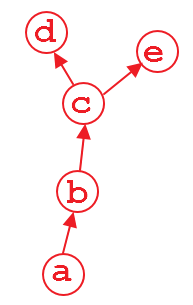

In [53]:
Image('./imgs/multi_loss.PNG')

In [54]:
'''
a = Variable(torch.randn(1,4),requires_grad=True)
b = a**2
c = b*2 

d = c.mean()
e = c.sum()

d.backward()
'''

'\na = Variable(torch.randn(1,4),requires_grad=True)\nb = a**2\nc = b*2 \n\nd = c.mean()\ne = c.sum()\n\nd.backward()\n'

In [55]:
#e.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...

In [56]:
a = Variable(torch.rand(1,4),requires_grad=True)
b = a**2
c = b*2

d = c.mean()
e = c.sum()
d.backward(retain_graph=True)
e.backward()

In [57]:
a = Variable(torch.tensor([1.,2.,3.,4.]),requires_grad=True)
b = a**2
c = b*2
# scalar
d = c.mean()
e = c.sum()

# d mean = 1/4 * 2 * 2 * a 
# d mean = a.grad = 1/4 * 2 * 2 * a = a = 1,2,3,4
d.backward(retain_graph=True)
# d sum = 2 * 2 * a = 4 * a = 4,8,12,16

# 两次 backwward 累加,没有zero_grad
# 5,10,15,20

print(a.grad)
e.backward()

print(a.grad)


tensor([1., 2., 3., 4.])
tensor([ 5., 10., 15., 20.])
